<a href="https://colab.research.google.com/github/flohmannjr/pytorch_learning/blob/main/PyTorch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch for Deep Learning & Machine Learning - Full Course - freeCodeCamp.org
https://youtu.be/V_xro1bcAuA

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import torch

from torch import nn

In [ ]:
torch.__version__

'1.13.1+cu116'

# Configs

In [ ]:
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['figure.dpi'] = 100

plt.style.use('seaborn-darkgrid')

SEED = 394140

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# Functions

In [ ]:
def get_lim(lim=[0, 1], test=[0, 1]):
    return (min(min(lim), min(test)), max(max(lim), max(test)))

def plot_data(X_train=[], y_train=[],
              X_test=[], y_test=[],
              X_pred=[], y_pred=[]):

    padding = 0.05
    xlim = get_lim()
    ylim = get_lim()
    legend_base = 0.995

    if(len(X_train) > 0):

        X_train = X_train.squeeze()
        y_train = y_train.squeeze()

        sns.scatterplot(x=X_train, y=y_train, size=1, legend=False, label='Train')

        xlim = get_lim(xlim, X_train)
        ylim = get_lim(ylim, y_train)

        legend_base -= 0.06

    if(len(X_test) > 0):

        X_test = X_test.squeeze()
        y_test = y_test.squeeze()

        sns.scatterplot(x=X_test, y=y_test, size=1, legend=False, label='Test')

        xlim = get_lim(xlim, X_test)
        ylim = get_lim(ylim, y_test)

        legend_base -= 0.06

    if(len(X_pred) > 0):

        X_pred = X_pred.squeeze()
        y_pred = y_pred.squeeze()

        sns.scatterplot(x=X_pred, y=y_pred, size=1, legend=False, label='Pred')

        xlim = get_lim(xlim, X_pred)
        ylim = get_lim(ylim, y_pred)

        legend_base -= 0.06

    plt.xlim(xlim[0] - padding, xlim[1] + padding)
    plt.ylim(ylim[0] - padding, ylim[1] + padding)

    plt.xticks(ticks=np.linspace(xlim[0], xlim[1], 11))
    plt.yticks(ticks=np.linspace(ylim[0], ylim[1], 11))

    plt.legend(loc=(1.02, legend_base), frameon=True, facecolor='white')

    plt.show()

def plot_loss(loss_train = [], loss_test = []):

    padding = 0.05
    ylim = get_lim()

    sns.lineplot(data=loss_train, label='Train loss')
    sns.lineplot(data=loss_test, label='Test loss')

    ylim = get_lim(ylim, loss_train)
    ylim = get_lim(ylim, loss_test)
    
    plt.ylim(ylim[0] - padding, ylim[1] + padding)

    plt.xticks(ticks=np.linspace(0, len(loss_train), 11))
    plt.yticks(ticks=np.linspace(ylim[0], ylim[1], 11))

    plt.legend(loc=(1.02, 0.88), frameon=True, facecolor='white')

    plt.show()

# Data

## Linear regression (y = ax + b)

In [ ]:
weight = 0.7
bias = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(dim=1)  # unsqueeze adds dimensions.
y = weight * X + bias

In [ ]:
# plot_data(X, y)

In [ ]:
n_train = int(len(X) * 0.8)

X_train, X_test, y_train, y_test = X[:n_train], X[n_train:], y[:n_train], y[n_train:]

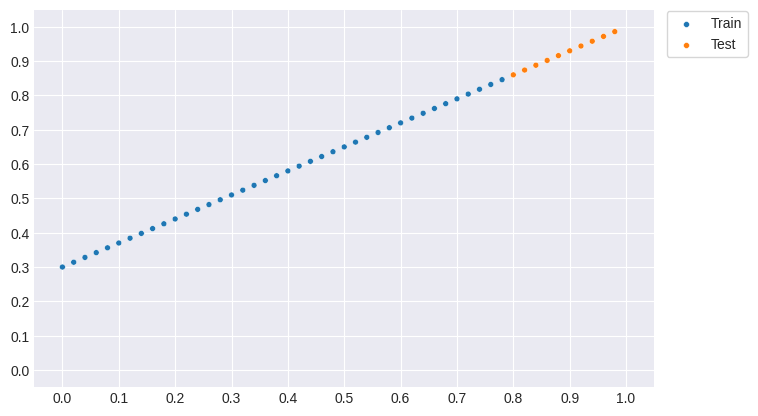

In [ ]:
plot_data(X_train, y_train,
          X_test, y_test)

# Models

In [ ]:
models = [None] * 10

## Linear regression

### Model

In [ ]:
class LRModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias    = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    
    def forward(self, x: torch.tensor) -> torch.tensor:
        return self.weights * x + self.bias

### Untrained

In [ ]:
torch.manual_seed(SEED)

models[0] = LRModel()

models[0].state_dict()

OrderedDict([('weights', tensor([0.9255])), ('bias', tensor([1.1597]))])

In [ ]:
# https://pytorch.org/docs/stable/generated/torch.inference_mode.html
# "Code run under this mode gets better performance by disabling view tracking and version counter bumps."

with torch.inference_mode():
    y_pred = models[0](X_test)

y_pred.squeeze()

tensor([1.9002, 1.9187, 1.9372, 1.9557, 1.9742, 1.9927, 2.0112, 2.0297, 2.0482,
        2.0667])

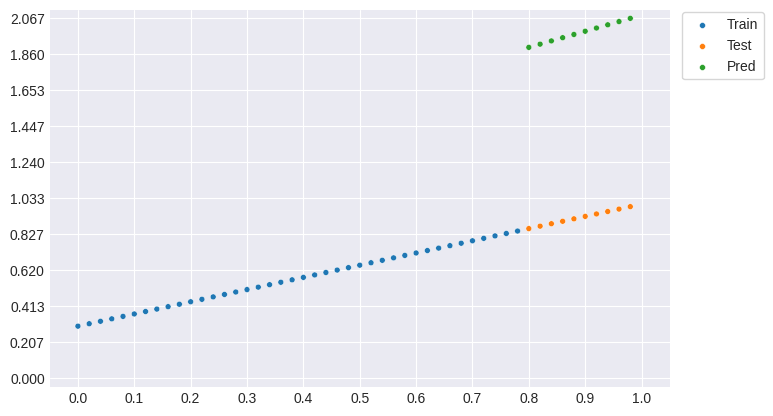

In [ ]:
plot_data(X_train, y_train,
          X_test, y_test,
          X_test, y_pred)

### Training

In [ ]:
torch.manual_seed(SEED)

models[0] = LRModel()
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(params=models[0].parameters(), lr=0.01)

epochs = 100

loss_train = []
loss_test  = []

for epoch in range(epochs):

    # Set the model to training mode (turn on required gradients)
    models[0].train()

    # 1. Forward pass
    y_pred = models[0](X_train)

    # 2. Calculate the loss
    loss = loss_func(y_pred, y_train)

    loss_train.append(loss.item())

    # 3. Zero grad of the optimizer (optimizer changes will acculumate through the loop)
    optimizer.zero_grad()

    # 4. Perform backpropagation (calculate gradients of each parameter)
    loss.backward()

    # 5. Progress the optimizer (perform gradient descent)
    optimizer.step()

    # Set the model to evaluation mode (turns off settings not needed for evaluation)
    models[0].eval()

    with torch.inference_mode():

        # 1. Forward pass
        y_pred = models[0](X_test)

        # 2. Calculate the loss
        loss = loss_func(y_pred, y_test)

        loss_test.append(loss.item())

        if epoch % 10 == 0:
            print(f'Epoch {epoch}: {models[0].state_dict()}, {loss_train[-1]}, {loss_test[-1]}')

Epoch 0: OrderedDict([('weights', tensor([0.9216])), ('bias', tensor([1.1497]))]), 0.9476914405822754, 1.0469756126403809
Epoch 10: OrderedDict([('weights', tensor([0.8826])), ('bias', tensor([1.0497]))]), 0.8324815630912781, 0.9122657775878906
Epoch 20: OrderedDict([('weights', tensor([0.8436])), ('bias', tensor([0.9497]))]), 0.7172716856002808, 0.7775559425354004
Epoch 30: OrderedDict([('weights', tensor([0.8046])), ('bias', tensor([0.8497]))]), 0.6020618677139282, 0.6428461670875549
Epoch 40: OrderedDict([('weights', tensor([0.7656])), ('bias', tensor([0.7497]))]), 0.4868519902229309, 0.5081362724304199
Epoch 50: OrderedDict([('weights', tensor([0.7266])), ('bias', tensor([0.6497]))]), 0.3716421127319336, 0.3734264075756073
Epoch 60: OrderedDict([('weights', tensor([0.6876])), ('bias', tensor([0.5497]))]), 0.2564322352409363, 0.23871657252311707
Epoch 70: OrderedDict([('weights', tensor([0.6486])), ('bias', tensor([0.4497]))]), 0.14122237265110016, 0.10400678217411041
Epoch 80: Orde

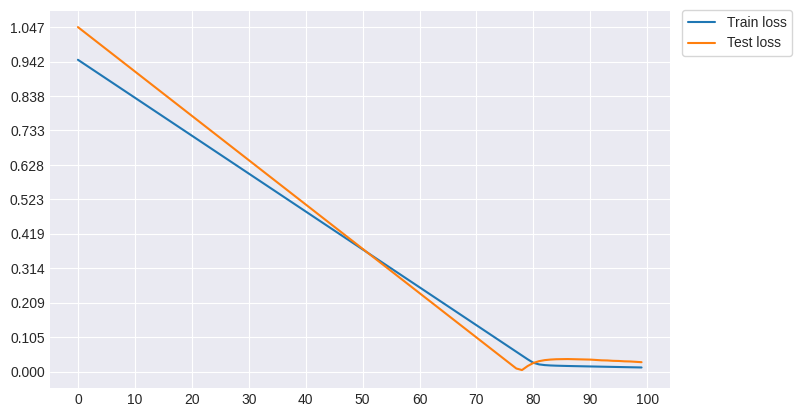

In [ ]:
plot_loss(loss_train, loss_test)

### Trained

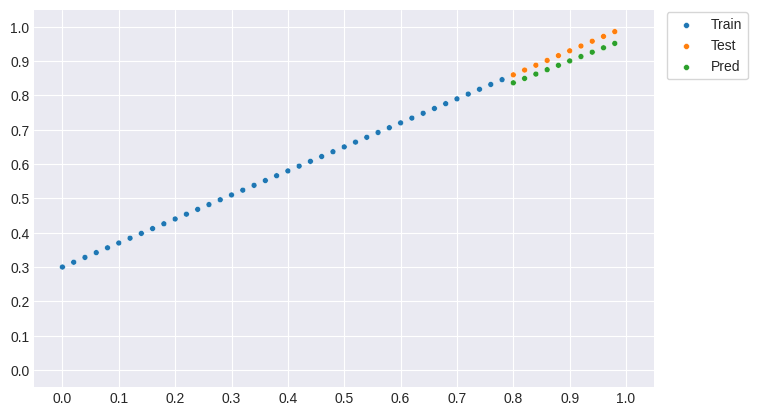

In [ ]:
with torch.inference_mode():
    y_pred = models[0](X_test)

plot_data(X_train, y_train,
          X_test, y_test,
          X_test, y_pred)

### Saving and loading

In [ ]:
models[0].state_dict()

OrderedDict([('weights', tensor([0.6381])), ('bias', tensor([0.3262]))])

In [ ]:
torch.save(obj=models[0].state_dict(), f='model_0.pth')

In [ ]:
models[0] = LRModel()
models[0].state_dict()

OrderedDict([('weights', tensor([-0.9011])), ('bias', tensor([-0.6319]))])

In [ ]:
models[0].load_state_dict(torch.load(f='model_0.pth'))
models[0].state_dict()

OrderedDict([('weights', tensor([0.6381])), ('bias', tensor([0.3262]))])

# I can't. I just can't. This course is bullshit and Bourke is insufferable.